# U1B model: neutrino masses inversion

The idea is to check the neutrino mases inversion to one loop.
Leshouches dictionary, SPHENO_4.0.3, micromegas_5.0.4

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
import pyslha
import pyU1B_LesHouches_generator
import neutrino_analytic_v2

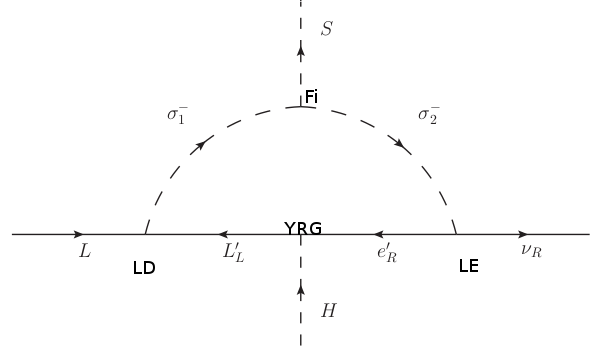

In [3]:
from IPython.display import Image
Image("zee-couplings.png")

Benchmark point + (defect values in the Leshouches input file)

In [4]:
L2 = -7.23E-2
YA1 = 0.6
YC1 = 1.0 #control the Fvv mass
vx = np.random.uniform(1500,3000)
YRG = 5.1E-1

Fi11 = 0.114
Fi12 = 0.0
Fi21 = 0.0
Fi22 = 0.3

LD11 = 1.11E-1
LD12 = 1.2E-1
LD13 = 1.2E-2
LD21 = 1.1E-2
LD22 = 1.3E-2
LD23 = 1.21E-2

LE11 = 1.11E-1
LE12 = 1.12E-1
LE21 = 1.13E-1
LE22 = 1.14E-2

run diccionary first time

In [5]:
x=[]

#opend the dictionary
xdict = pyU1B_LesHouches_generator.buildSLHAinFile()
    
#Modify one parameter
xdict.blocks['MINPAR'].entries[2]='%.6E    # Lambda2INPUT'%L2
xdict.blocks['MINPAR'].entries[7]='%.6E    # YA1INPUT'%YA1
xdict.blocks['MINPAR'].entries[11]='%.6E    # YC1INPUT'%YC1
xdict.blocks['MINPAR'].entries[13]='%.6E    # YRGINPUT'%YRG
xdict.blocks['MINPAR'].entries[15]='%.6E    # vXInput'%vx

xdict.blocks['FIIN'].entries[1,1]='%.6E    # Fi(1,1)'%Fi11
xdict.blocks['FIIN'].entries[1,2]='%.6E    # Fi(1,2)'%Fi12
xdict.blocks['FIIN'].entries[2,1]='%.6E    # Fi(2,1)'%Fi21
xdict.blocks['FIIN'].entries[2,2]='%.6E    # Fi(2,2)'%Fi22

xdict.blocks['LDIN'].entries[1,1]='%.6E    # LD(1,1)'%LD11
xdict.blocks['LDIN'].entries[1,2]='%.6E    # LD(1,2)'%LD12
xdict.blocks['LDIN'].entries[1,3]='%.6E    # LD(1,3)'%LD13
xdict.blocks['LDIN'].entries[2,1]='%.6E    # LD(2,1)'%LD21
xdict.blocks['LDIN'].entries[2,2]='%.6E    # LD(2,2)'%LD22
xdict.blocks['LDIN'].entries[2,3]='%.6E    # LD(2,3)'%LD23

xdict.blocks['LEIN'].entries[1,1]='%.6E    # LE(1,1)'%LE11
xdict.blocks['LEIN'].entries[1,2]='%.6E    # LE(1,2)'%LE12
xdict.blocks['LEIN'].entries[2,1]='%.6E    # LE(2,1)'%LE21
xdict.blocks['LEIN'].entries[2,2]='%.6E    # LE(2,2)'%LE22

pyslha.writeSLHAFile('LesHouches.in.U1B_low',xdict) 

#run SPheno
spheno = subprocess.getoutput('~/Work/SPheno-4.0.3/bin/SPhenoU1B LesHouches.in.U1B_low')    
so = subprocess.getoutput('cat SPheno.spc.U1B')

#take spheno data
MZp = eval(so.split('# VWm')[1].split()[1])
mnu1 = np.abs(eval(so.split('# Fe_3')[1].split()[1]))
mnu2 = np.abs(eval(so.split('# Fe_3')[1].split()[5]))
mnu3 = np.abs(eval(so.split('# Fe_3')[1].split()[13]))

ZP22 = eval(so.split('# ZP(2,1)')[1].split()[2])
ZP23 = eval(so.split('# ZP(2,1)')[1].split()[7])
ZP24 = eval(so.split('# ZP(2,1)')[1].split()[12])
ZP25 = eval(so.split('# ZP(2,1)')[1].split()[17])

ZP32 = eval(so.split('# ZP(2,1)')[1].split()[27])
ZP33 = eval(so.split('# ZP(2,1)')[1].split()[32])
ZP34 = eval(so.split('# ZP(2,1)')[1].split()[37])
ZP35 = eval(so.split('# ZP(2,1)')[1].split()[42])

ZP42 = eval(so.split('# ZP(2,1)')[1].split()[52])
ZP43 = eval(so.split('# ZP(2,1)')[1].split()[57])
ZP44 = eval(so.split('# ZP(2,1)')[1].split()[62])
ZP45 = eval(so.split('# ZP(2,1)')[1].split()[67])

ZP52 = eval(so.split('# ZP(2,1)')[1].split()[77])
ZP53 = eval(so.split('# ZP(2,1)')[1].split()[82])
ZP54 = eval(so.split('# ZP(2,1)')[1].split()[87])
ZP55 = eval(so.split('# ZP(2,1)')[1].split()[92])
    
mH2=eval(so.split('Block MASS')[1].split()[17])
mH3=eval(so.split('Block MASS')[1].split()[21])
mH4=eval(so.split('Block MASS')[1].split()[25])
mH5=eval(so.split('Block MASS')[1].split()[29])
meD1=eval(so.split('# Fvv')[1].split()[1])
meD2=eval(so.split('# Fvv')[1].split()[5])

VL11=eval(so.split('Block UELDMIX')[1].split()[6])
VL12=eval(so.split('Block UELDMIX')[1].split()[11])
VL21=eval(so.split('Block UELDMIX')[1].split()[16])
VL22=eval(so.split('Block UELDMIX')[1].split()[21])

UL11=eval(so.split('Block UERDMIX')[1].split()[6])
UL12=eval(so.split('Block UERDMIX')[1].split()[11])
UL21=eval(so.split('Block UERDMIX')[1].split()[16])
UL22=eval(so.split('Block UERDMIX')[1].split()[21])

x.append([L2,YA1,YC1,vx,YRG,Fi11,Fi12,Fi21,Fi22,LD11,LD12,LD13,LD21,LD22,LD23,LE11,LE12,LE21,LE22,MZp,\
          mnu1,mnu2,mnu3,ZP22,ZP23,ZP24,ZP25,ZP32,ZP33,ZP34,ZP35,ZP42,ZP43,ZP44,ZP45,ZP52,ZP53,ZP54,ZP55,\
             mH2,mH3,mH4,mH5,meD1,meD2,VL11,VL12,VL21,VL22,UL11,UL12,UL21,UL22])

x=np.asarray(x)
xd=pd.DataFrame(x,columns=['L2','YA1','YC1','vx','YRG','Fi11','Fi12','Fi21','Fi22','LD11','LD12','LD13',\
                           'LD21','LD22','LD23','LE11','LE12','LE21','LE22','MZp','mnu1','mnu2','mnu3',\
                           'ZP22','ZP23','ZP24','ZP25','ZP32','ZP33','ZP34','ZP35','ZP42','ZP43','ZP44',\
                           'ZP45','ZP52','ZP53','ZP54','ZP55','mH2','mH3','mH4','mH5','meD1','meD2',\
                           'VL11','VL12','VL21','VL22','UL11','UL12','UL21','UL22'])  


In [6]:
xd[['mnu1','mnu2','mnu3']]

,mnu1,mnu2,mnu3
0,7.659136e-27,3.186668e-10,3.590529e-08


PMNS matrix

In [7]:
#PMNS matrix 2018 to 3\sigma https://arxiv.org/abs/1708.01186

#phases of the PMNS matrix and the R 
phases1 = np.random.uniform(0.,0.0*np.pi,3) # WARNING! They are in zero
delta = phases1[0]
eta1 = phases1[1]
eta2 = phases1[2]

#light neutrino masses (up 3 sigma range) NH (NO)
#mnu1 = 10**((np.log10(2.5e-3)-np.log10(1e-9))*np.random.uniform(0,1)+np.log10(1e-9))*1e-9 
#Zero in this framework
mv1 = 1.0e-20
mv2 = np.sqrt(np.random.uniform(7.05e-5,8.14e-5)*1.0e-18+mv1**2)
mv3 = np.sqrt(np.random.uniform(2.41e-3,2.60e-3)*1.0e-18+mv1**2)

#mixing angles (up 3 sigma range) NH
t12 = np.arcsin(np.sqrt(np.random.uniform(0.273,0.379)))
t23 = np.arcsin(np.sqrt(np.random.uniform(0.445,0.599)))
t13 = np.arcsin(np.sqrt(np.random.uniform(0.0196,0.0241)))

#Building PMNS matrix NH
UM12 = np.array([ [np.cos(t12),np.sin(t12),0.], [-np.sin(t12),np.cos(t12),0.], [0.,0.,1.0] ])
UM13 = np.array([ [np.cos(t13),0.,np.sin(t13)], [0.,1.0,0.], [-np.sin(t13),0.,np.cos(t13)] ])
UM23 = np.array([ [1.0,0.,0.], [0.,np.cos(t23),np.sin(t23)], [0.,-np.sin(t23),np.cos(t23)] ])
Uphases = np.array([ [np.exp(eta1*1j),0.,0.], [0.,np.exp(eta2*1j),0.], [0.,0.,1.0] ])
U=np.dot(UM23,np.dot(UM13,np.dot(UM12,Uphases))).real

In [8]:
print("mv1=",mv1,"mv2=",mv2,"mv3=",mv3)
print(U)

mv1= 1e-20 mv2= 8.74795422269e-12 mv3= 5.02905201558e-11
[[ 0.78903127  0.59607907  0.14872591]
 [-0.52366109  0.52595513  0.67018674]
 [ 0.32126113 -0.60668026  0.72713846]]


In [9]:
U11=U[0,0]
U12=U[0,1]
U13=U[0,2]
U21=U[1,0]
U22=U[1,1]
U23=U[1,2]
U31=U[2,0]
U32=U[2,1]
U33=U[2,2]

Neutrino invertion algorithm

$\Lambda_i$ factors

In [10]:
L1=neutrino_analytic_v2.Lab(ZP22,ZP32,ZP42,ZP52,ZP24,ZP34,ZP44,ZP54,meD1,meD2,mH2,mH3,mH4,mH5,VL11,VL21,UL11,UL21)
L2=neutrino_analytic_v2.Lab(ZP23,ZP33,ZP43,ZP53,ZP25,ZP35,ZP45,ZP55,meD1,meD2,mH2,mH3,mH4,mH5,VL11,VL21,UL11,UL21)
print(L1,L2)

1.36390455423e-06 4.14207141252e-07


In [11]:
#Random free parameters and Mathematic rutine
he12 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
he13 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
he22 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
he23 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))

hd11 = -(1/L1)*(he23*mv2*U12 - he22*mv3*U13)/(he13*he22 - he12*he23)
hd12 = -(1/L1)*(he23*mv2*U22 - he22*mv3*U23)/(he13*he22 - he12*he23)
hd13 = -(1/L1)*(he23*mv2*U32 - he22*mv3*U33)/(he13*he22 - he12*he23)

hd21 = +(1/L2)*(he13*mv2*U12 - he12*mv3*U13)/(he13*he22 - he12*he23)
hd22 = +(1/L2)*(he13*mv2*U22 - he12*mv3*U23)/(he13*he22 - he12*he23)
hd23 = +(1/L2)*(he13*mv2*U32 - he12*mv3*U33)/(he13*he22 - he12*he23)

run dicctionary second time

In [12]:
z=[]

#opend the dictionary
xdict = pyU1B_LesHouches_generator.buildSLHAinFile()
    
#Modify one parameter
xdict.blocks['MINPAR'].entries[2]='%.6E    # Lambda2INPUT'%L2
xdict.blocks['MINPAR'].entries[7]='%.6E    # YA1INPUT'%YA1
xdict.blocks['MINPAR'].entries[11]='%.6E    # YC1INPUT'%YC1
xdict.blocks['MINPAR'].entries[13]='%.6E    # YRGINPUT'%YRG
xdict.blocks['MINPAR'].entries[15]='%.6E    # vXInput'%vx

xdict.blocks['FIIN'].entries[1,1]='%.6E    # Fi(1,1)'%Fi11
xdict.blocks['FIIN'].entries[1,2]='%.6E    # Fi(1,2)'%Fi12
xdict.blocks['FIIN'].entries[2,1]='%.6E    # Fi(2,1)'%Fi21
xdict.blocks['FIIN'].entries[2,2]='%.6E    # Fi(2,2)'%Fi22

xdict.blocks['LDIN'].entries[1,1]='%.6E    # LD(1,1)'%hd11
xdict.blocks['LDIN'].entries[1,2]='%.6E    # LD(1,2)'%hd12
xdict.blocks['LDIN'].entries[1,3]='%.6E    # LD(1,3)'%hd13
xdict.blocks['LDIN'].entries[2,1]='%.6E    # LD(2,1)'%hd21
xdict.blocks['LDIN'].entries[2,2]='%.6E    # LD(2,2)'%hd22
xdict.blocks['LDIN'].entries[2,3]='%.6E    # LD(2,3)'%hd23

xdict.blocks['LEIN'].entries[1,1]='%.6E    # LE(1,1)'%he12
xdict.blocks['LEIN'].entries[1,2]='%.6E    # LE(1,2)'%he13
xdict.blocks['LEIN'].entries[2,1]='%.6E    # LE(2,1)'%he22
xdict.blocks['LEIN'].entries[2,2]='%.6E    # LE(2,2)'%he23

pyslha.writeSLHAFile('LesHouches.in.U1B_low',xdict) 

#run SPheno
spheno = subprocess.getoutput('~/Work/SPheno-4.0.3/bin/SPhenoU1B LesHouches.in.U1B_low')    
so = subprocess.getoutput('cat SPheno.spc.U1B')

#take spheno data
MZp = eval(so.split('# VWm')[1].split()[1])
mnu1 = np.abs(eval(so.split('# Fe_3')[1].split()[1]))
mnu2 = np.abs(eval(so.split('# Fe_3')[1].split()[5]))
mnu3 = np.abs(eval(so.split('# Fe_3')[1].split()[13]))

ZP22 = eval(so.split('# ZP(2,1)')[1].split()[2])
ZP23 = eval(so.split('# ZP(2,1)')[1].split()[7])
ZP24 = eval(so.split('# ZP(2,1)')[1].split()[12])
ZP25 = eval(so.split('# ZP(2,1)')[1].split()[17])

ZP32 = eval(so.split('# ZP(2,1)')[1].split()[27])
ZP33 = eval(so.split('# ZP(2,1)')[1].split()[32])
ZP34 = eval(so.split('# ZP(2,1)')[1].split()[37])
ZP35 = eval(so.split('# ZP(2,1)')[1].split()[42])

ZP42 = eval(so.split('# ZP(2,1)')[1].split()[52])
ZP43 = eval(so.split('# ZP(2,1)')[1].split()[57])
ZP44 = eval(so.split('# ZP(2,1)')[1].split()[62])
ZP45 = eval(so.split('# ZP(2,1)')[1].split()[67])

ZP52 = eval(so.split('# ZP(2,1)')[1].split()[77])
ZP53 = eval(so.split('# ZP(2,1)')[1].split()[82])
ZP54 = eval(so.split('# ZP(2,1)')[1].split()[87])
ZP55 = eval(so.split('# ZP(2,1)')[1].split()[92])
    
mH2=eval(so.split('Block MASS')[1].split()[17])
mH3=eval(so.split('Block MASS')[1].split()[21])
mH4=eval(so.split('Block MASS')[1].split()[25])
mH5=eval(so.split('Block MASS')[1].split()[29])
meD1=eval(so.split('# Fvv')[1].split()[1])
meD2=eval(so.split('# Fvv')[1].split()[5])

VL11=eval(so.split('Block UELDMIX')[1].split()[6])
VL12=eval(so.split('Block UELDMIX')[1].split()[11])
VL21=eval(so.split('Block UELDMIX')[1].split()[16])
VL22=eval(so.split('Block UELDMIX')[1].split()[21])

UL11=eval(so.split('Block UERDMIX')[1].split()[6])
UL12=eval(so.split('Block UERDMIX')[1].split()[11])
UL21=eval(so.split('Block UERDMIX')[1].split()[16])
UL22=eval(so.split('Block UERDMIX')[1].split()[21])

z.append([L2,YA1,YC1,vx,YRG,Fi11,Fi12,Fi21,Fi22,LD11,LD12,LD13,LD21,LD22,LD23,LE11,LE12,LE21,LE22,MZp,\
          mnu1,mnu2,mnu3,ZP22,ZP23,ZP24,ZP25,ZP32,ZP33,ZP34,ZP35,ZP42,ZP43,ZP44,ZP45,ZP52,ZP53,ZP54,ZP55,\
             mH2,mH3,mH4,mH5,meD1,meD2,VL11,VL12,VL21,VL22,UL11,UL12,UL21,UL22])

z=np.asarray(z)
zd=pd.DataFrame(z,columns=['L2','YA1','YC1','vx','YRG','Fi11','Fi12','Fi21','Fi22','LD11','LD12','LD13',\
                           'LD21','LD22','LD23','LE11','LE12','LE21','LE22','MZp','mnu1','mnu2','mnu3',\
                           'ZP22','ZP23','ZP24','ZP25','ZP32','ZP33','ZP34','ZP35','ZP42','ZP43','ZP44',\
                           'ZP45','ZP52','ZP53','ZP54','ZP55','mH2','mH3','mH4','mH5','meD1','meD2',\
                           'VL11','VL12','VL21','VL22','UL11','UL12','UL21','UL22'])  

In [16]:
zd[['mnu1','mnu2','mnu3']]

,mnu1,mnu2,mnu3
0,1.862402e-28,8.747759e-12,5.028937e-11


In [39]:
print("=============================================")
print(" Experimental values (PMNS) \n")
print(mv1,mv2,mv3)
print("=============================================")
print(" Rutine inversion \n")
print(mnu1,mnu2,mnu3)
print("=============================================")

 Experimental values (PMNS) 

1e-20 8.74795422269e-12 5.02905201558e-11
 Rutine inversion 

1.86240229e-28 8.74775927e-12 5.02893657e-11


Neutrino $M_{ij}^{\nu}$ matrix:

\begin{equation}
M_{ik}^{\nu} = (h_d)^{\alpha i} \Lambda^{\alpha\beta} (h_e)^{\beta k}
\end{equation}

In [19]:
y=[]

for i in range(0,xd.shape[0]):
    
    a = neutrino_analytic_v2.Mab(xd.ZP22[i],xd.ZP23[i],xd.ZP24[i],xd.ZP25[i],xd.ZP32[i],xd.ZP33[i],xd.ZP34[i],xd.ZP35[i],xd.ZP42[i],xd.ZP43[i],\
                           xd.ZP44[i],xd.ZP45[i],xd.ZP52[i],xd.ZP53[i],xd.ZP54[i],xd.ZP55[i],xd.meD1[i],xd.meD2[i],\
    xd.mH2[i],xd.mH3[i],xd.mH4[i],xd.mH5[i],xd.VL11[i],xd.VL21[i],xd.UL11[i],xd.UL21[i],xd.LD11[i],xd.LD12[i],\
    xd.LD13[i],xd.LD21[i],xd.LD22[i],xd.LD23[i],xd.LE11[i],xd.LE12[i],0.,xd.LE21[i],xd.LE22[i],0.)
    
    mn1 = a[0]
    mn2 = a[1]
    mn3 = a[2]
    
    y.append([mn1,mn2,mn3])

y=np.asarray(y)
yd=pd.DataFrame(y,columns=['mn1','mn2','mn3'])

In [20]:
yd[:2]

,mn1,mn2,mn3
0,3.713443e-16,3.186668e-10,3.590529e-08


In [18]:
xd[['mnu1','mnu2','mnu3']][:2]

,mnu1,mnu2,mnu3
0,9.575239e-27,5.634659e-10,5.645737e-08


In [13]:
#For good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

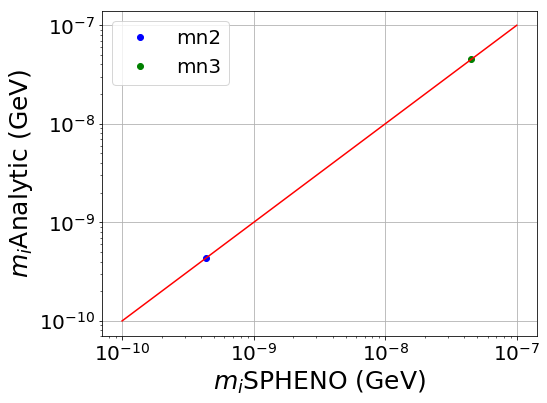

In [14]:
plt.figure(figsize=(8,6))

#plt.loglog(xd.mv1,xd.mn1,'bo')
plt.loglog(xd.mnu2,yd.mn2,'bo')
plt.loglog(xd.mnu3,yd.mn3,'go')

a = np.linspace(1e-10,1e-07,20)
plt.plot(a,a,'r-')

plt.xlabel(r'$m_i$SPHENO (GeV)',size=25)
plt.ylabel(r'$m_i$Analytic (GeV)',size=25)
plt.legend()

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses_v2.pdf')